# Phân loại đa lớp - Hồi quy Softmax

Hồi quy Softmax (hay Multinomial Logistic Regression, tức _Hồi quy logistic đa lớp_) là mô hình học có giám sát được sử dụng để xử lý các bài toán phân loại nhiều hơn 2 lớp.

Giả sử có một bộ dữ liệu $\mathcal{D}$ gồm $N$ mẫu và mỗi mẫu dữ liệu $(\mathbf{x}_i,y_i)$ bao gồm vector thể hiện cho $d$ đặc trưng $\mathbf{x}_i \in \mathbb{R}^d$ và một nhãn $y_i \in \{1,2,\ldots,K\}$ với $K$ là số lượng lớp. Mô hình Softmax dự đoán xác suất của một mẫu thuộc về lớp $k$ thông qua công thức:
\begin{align*}
P\left(y=k|\mathbf{x};\mathbf{W}\right) = \frac{e^{\mathbf{w}^T_k \mathbf{x}}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}}}
\end{align*}

Trong công thức này, $\mathbf{W} = [\mathbf{w}_1,\mathbf{w}_2,\ldots,\mathbf{w}_K] \in \mathbb{R}^{d\times K}$ là ma trận trọng số cần học và $\mathbf{w}_k \in \mathbb{R}^d$ là vector trọng số cho lớp $k$.

Hàm mất mát thường sử dụng có dạng cross - entropy, được định nghĩa như sau:
\begin{align*}
\mathcal{L}(\mathbf{W}) = - \frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K 1(y_i=k) \ln P\left(y_i=k|\mathbf{x}_i;\mathbf{W}\right)
\end{align*}

Với $1(y_i=k)$ là hàm chỉ thị, bằng $1$ nếu $y_i = k$ đúng và bằng $0$ nếu $y_i \neq k$.

Ta sẽ mã hóa $y_i$ bởi một vector $\mathbf{y}_i = (y_{1i},y_{2i},\ldots,y_{Ki})^T \in \mathbb{R}^K$ có $y_{ki}=1$ nếu $y_i = k$ và $y_{ji}=0$ với mọi $j \neq k$. Đồng thời, đặt $a_{ki} = P\left(y_i=k|\mathbf{x}_i;\mathbf{W}\right)$ là xác suất dự đoán mẫu dữ liệu thứ $i$ rơi vào lớp $k$. Ta thu được ma trận dữ liệu thực tế $X=[\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_N] \in \mathbb{R}^{d\times N}$ với lớp thực tế $Y = [y_{ki}] \in \mathbb{R}^{K\times N}$ và ma trận dự đoán $A = [a_{ki}] \in \mathbb{R}^{K\times N}$. Khi ấy ta có thể viết lại:
\begin{align*}
\mathcal{L}(\mathbf{W}) = - \frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ki} \ln(a_{ki})
\end{align*}

Với chỉ một điểm dữ liệu $(\mathbf{x}_i,y_i)$ ta có:
\begin{align*}
\mathcal{L}_i(\mathbf{W}) = - \sum_{k=1}^K y_{ki} \ln(a_{ki}) = - \sum_{k=1}^K y_{ki} \ln\left(\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x_i}}}\right) = - \sum_{k=1}^K \left[y_{ki}\mathbf{w}^T_k \mathbf{x}_i-y_{ki}\ln\left(\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}\right)\right]
\end{align*}

Lưu ý, ta có tổng xác suất $\sum_{k=1}^K y_{ki} = 1$ nên viết lại thành:
\begin{align*}
\mathcal{L}_i(\mathbf{W}) = - \sum_{k=1}^K y_{ki} \ln(a_{ki}) = - \sum_{k=1}^K y_{ki} \ln\left(\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x_i}}}\right) = - \left(\sum_{k=1}^K y_{ki}\mathbf{w}^T_k \mathbf{x}_i\right)+\ln\left(\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}\right)
\end{align*}

Lấy đạo hàm riêng theo vector $\mathbf{w}_k$ ta có:
\begin{align*}
\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_k} = -y_{ki}\mathbf{x}_i+\frac{e^{\mathbf{w}^T_k \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}^T_j \mathbf{x}_i}}\mathbf{x}_i = (a_{ki}-y_{ki})\mathbf{x}_i = e_{ki}\mathbf{x}_i
\end{align*}

Với $e_{ki}=a_{ki}-y_{ki}$ là sai số (số thực). Thế thì:
\begin{align*}
\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{W}} = \left[\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_1},\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_2},\ldots,\frac{\partial \mathcal{L}_i(\mathbf{W})}{\partial \mathbf{w}_K}\right]=(e_{1i},e_{2i},\ldots,e_{Ki})\mathbf{x}_i = \mathbf{x}_ie_i^T
\end{align*}

Vậy gradient của $\mathcal{L}(\mathbf{W})$ theo ma trận $\mathbf{W}$ là:
\begin{align*}
\frac{\partial \mathcal{L}(\mathbf{W})}{\partial \mathbf{W}} = \frac{1}{N}XE^T = \frac{1}{N}X(A-Y)^T
\end{align*}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Định nghĩa các hàm cần thiết cho Hồi quy softmax

In [2]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    N = y_true.shape[1]  # Số lượng mẫu
    log_likelihood = -np.log(y_pred[y_true.argmax(axis=0), np.arange(N)])
    loss = np.sum(log_likelihood) / N
    return loss

def predict(W, b, X):
    Z = np.dot(W.T, X) + b
    return softmax(Z)

def compute_accuracy(y_true, y_pred):
    # Convert one-hot encoded predictions and labels to integers
    y_true_classes = np.argmax(y_true, axis=0)
    y_pred_classes = np.argmax(y_pred, axis=0)
    
    # Compute accuracy
    accuracy = np.mean(y_true_classes == y_pred_classes)
    return accuracy

# Thiết kế mạng nơ-ron đơn giản

In [3]:
def softmax_regression_nn(X, y, epochs, lr):
    d, N = X.shape # d: số lượng đặc trưng, N: số lượng mẫu dữ liệu
    K = y.shape[0] # K là số lớp cần phân loại

    # Khởi tạo trọng số và bias
    W = np.random.randn(d, K) * 0.01
    b = np.zeros((K, 1))

    # Lưu lại độ chính xác tốt nhất
    best_accuracy = 0
    best_W = None
    best_b = None
    losses = [] 
    accuracies = []
    
    for epoch in range(epochs):
        # Lan truyền tiến
        Z = np.dot(W.T, X) + b
        A = softmax(Z)

        # Tính toán mất mát
        loss = cross_entropy_loss(y, A)
        losses.append(loss)

        # Lan truyền ngược
        E = A - y
        dW = 1/N * np.dot(X, E.T)
        db = 1/N * np.sum(E, axis=1, keepdims=True)

        # Cập nhật trọng số
        W = W - lr * dW
        b = b - lr * db

        # Tính toán độ chính xác
        accuracy = compute_accuracy(y, A)
        accuracies.append(accuracy)

        # Lưu trọng số có độ chính xác cao nhất
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_W = W
            best_b = b
        
        # In ra mất mát và độ chính xác mỗi 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    
    return best_W, best_b, losses, accuracies, best_accuracy

# Sử dụng tối ưu Adam

In [4]:
def softmax_regression_nn_adam(X, y, epochs, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
    d, N = X.shape 
    K = y.shape[0] 

    W = np.random.randn(d, K) * 0.01
    b = np.zeros((K, 1))

    best_accuracy = 0
    best_W = None
    best_b = None
    losses = [] 
    accuracies = []
    
    # Khởi tạo moment và velocity cho Adam
    m_W, v_W = np.zeros_like(W), np.zeros_like(W)
    m_b, v_b = np.zeros_like(b), np.zeros_like(b)
    t = 0
    
    for epoch in range(epochs):
        Z = np.dot(W.T, X) + b
        A = softmax(Z)

        loss = cross_entropy_loss(y, A)
        losses.append(loss)

        E = A - y
        dW = 1/N * np.dot(X, E.T)
        db = 1/N * np.sum(E, axis=1, keepdims=True)
        
        # Tính toán các giá trị moment và velocity
        t += 1  # Tăng bước thời gian
        m_W = beta1 * m_W + (1 - beta1) * dW
        v_W = beta2 * v_W + (1 - beta2) * (dW ** 2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
        
        # Điều chỉnh các giá trị moment
        m_W_corr = m_W / (1 - beta1 ** t)
        v_W_corr = v_W / (1 - beta2 ** t)
        m_b_corr = m_b / (1 - beta1 ** t)
        v_b_corr = v_b / (1 - beta2 ** t)
        
        # Cập nhật tham số
        W = W - lr * m_W_corr / (np.sqrt(v_W_corr) + epsilon)
        b = b - lr * m_b_corr / (np.sqrt(v_b_corr) + epsilon)

        accuracy = compute_accuracy(y, A)
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_W = W
            best_b = b
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    
    return best_W, best_b, losses, accuracies, best_accuracy

In [5]:
data = pd.read_csv("C:\\Users\\admin\\Downloads\\winequality-red.csv")
data_head = data.head()

print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

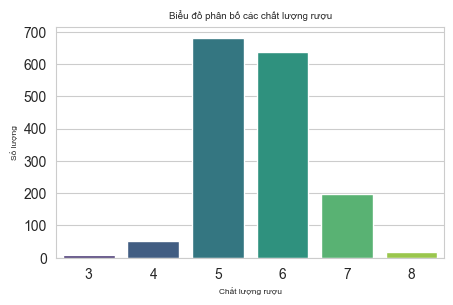

In [6]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram for the 'quality' column
plt.figure(figsize=(5, 3))
sns.countplot(x='quality', data=data, palette='viridis')

# Title and labels
plt.title('Biểu đồ phân bố các chất lượng rượu', fontsize=7)
plt.xlabel('Chất lượng rượu', fontsize=6)
plt.ylabel('Số lượng', fontsize=6)

# Display the plot
plt.show()

In [7]:
# Chia thuộc tính và nhãn
X = data.drop("quality", axis=1).values
y = data["quality"].values

# Chia tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

# Chuẩn hóa dữ liệu
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mã hóa y dưới dạng vector 6 chiều
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Chuyển vị về đúng kích thước
X_train_T, X_test_T = X_train_scaled.T, X_test_scaled.T
y_train_T, y_test_T = y_train_encoded.T, y_test_encoded.T

In [8]:
best_W, best_b, losses, accuracies, best_accuracy = softmax_regression_nn(X_train_T, y_train_T, epochs=1000, lr=0.001)

# Kết quả độ chính xác cao nhất đạt được
print(f"Best accuracy: {best_accuracy}")

Epoch 0, Loss: 7.149167423927159, Accuracy: 0.2705238467552776
Epoch 100, Loss: 7.134045057320442, Accuracy: 0.36825645035183735
Epoch 200, Loss: 7.1198766184378846, Accuracy: 0.39014855355746675
Epoch 300, Loss: 7.106652948149508, Accuracy: 0.40969507427677876
Epoch 400, Loss: 7.094364572777015, Accuracy: 0.42298670836591085
Epoch 500, Loss: 7.083001771112417, Accuracy: 0.436278342455043
Epoch 600, Loss: 7.072554638433828, Accuracy: 0.4394057857701329
Epoch 700, Loss: 7.063013146984699, Accuracy: 0.44253322908522286
Epoch 800, Loss: 7.0543672024869135, Accuracy: 0.4394057857701329
Epoch 900, Loss: 7.046606696359999, Accuracy: 0.4401876465989054
Best accuracy: 0.4440969507427678


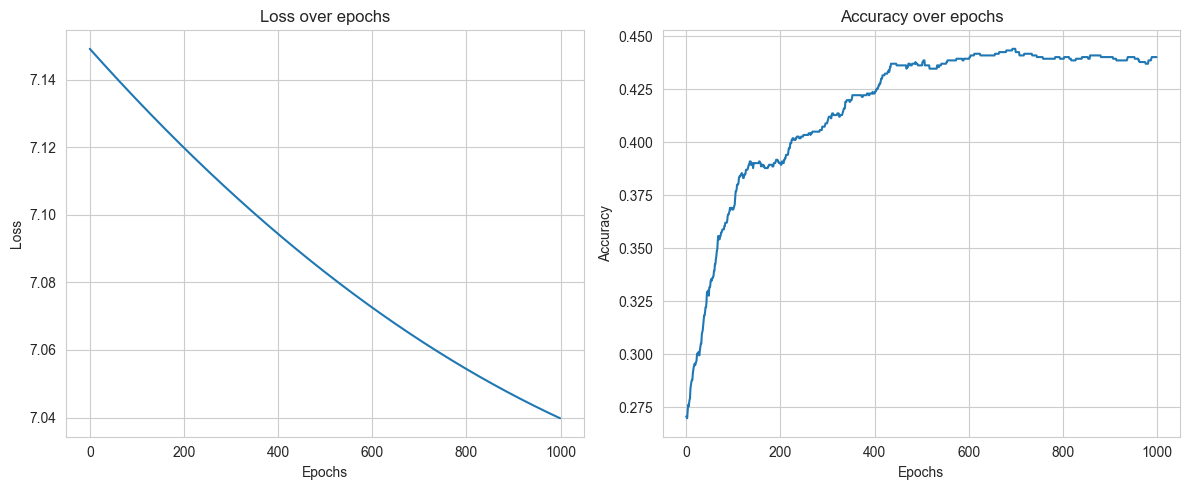

In [9]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [10]:
best_W, best_b, losses, accuracies, best_accuracy = softmax_regression_nn_adam(X_train_T, y_train_T, epochs=1000, lr=0.00005)

# Kết quả độ chính xác cao nhất đạt được
print(f"Best accuracy: {best_accuracy}")

Epoch 0, Loss: 7.153455596705277, Accuracy: 0.0797498045347928
Epoch 100, Loss: 7.143862117695741, Accuracy: 0.13213448006254885
Epoch 200, Loss: 7.134653424218733, Accuracy: 0.21188428459734168
Epoch 300, Loss: 7.125827890699715, Accuracy: 0.24159499609069585
Epoch 400, Loss: 7.117384294998147, Accuracy: 0.26348709929632524
Epoch 500, Loss: 7.1093213215725095, Accuracy: 0.27834245504300237
Epoch 600, Loss: 7.101637588345077, Accuracy: 0.28537920250195464
Epoch 700, Loss: 7.094331723010832, Accuracy: 0.290852228303362
Epoch 800, Loss: 7.087402377767531, Accuracy: 0.29319781078967944
Epoch 900, Loss: 7.080848226853347, Accuracy: 0.2986708365910868
Best accuracy: 0.29945269741985925


# Sử dụng thư viện Scikit-learn với Hồi quy logistic đa lớp

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split attributes and labels
X = data.drop("quality", axis=1).values
y = data["quality"].values

# Split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.6090695856137608
0.590625


# Sử dụng thư viện TensorFlow

In [12]:
import tensorflow as tf

X = data.drop("quality", axis=1).values
y = data["quality"].values

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mã hóa nhãn dưới dạng vector
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Thiết kế mô hình
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Lớp đầu vào
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Lớp đầu ra
])

# Khởi tạo mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, validation_split=0.2, verbose=0)

# Đánh giá mô hình
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

# In ra độ chính xác trên tập huấn luyện và kiểm tra
print(train_acc)
print(test_acc)

0.6067240238189697
0.590624988079071


# Sử dụng Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Khởi tạo và huấn luyện mô hình RandomForest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Sử dụng nhiều cây hơn
    max_depth=5,  # Giảm độ sâu tối đa của mỗi cây
    min_samples_split=10,  # Tăng số lượng mẫu tối thiểu để chia nút
    min_samples_leaf=10,  # Tăng số lượng mẫu tối thiểu ở mỗi lá
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(train_accuracy)
print(test_accuracy)

0.6802189210320563
0.58125


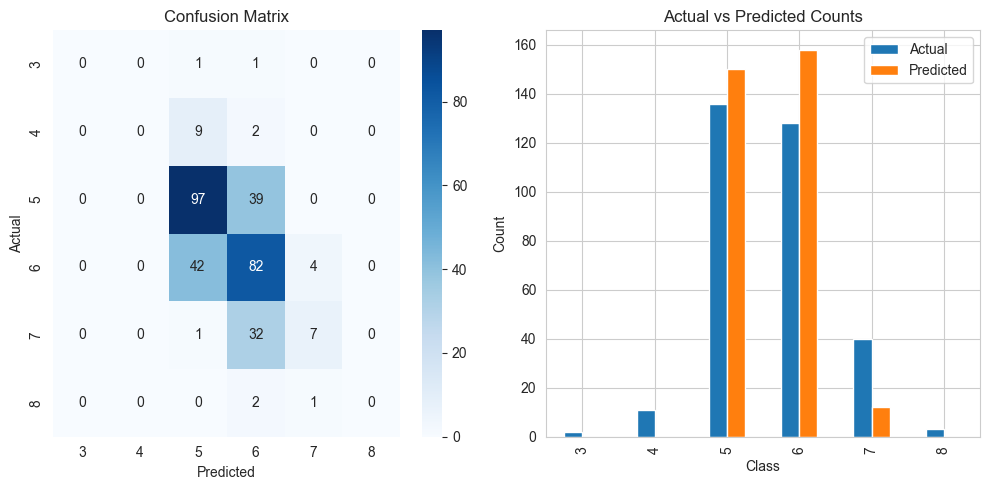

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_test)

# Biểu đồ
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 2, 2)
actual_count = pd.Series(y_test).value_counts().sort_index()
predicted_count = pd.Series(y_pred_test).value_counts().sort_index()
all_counts = pd.concat([actual_count, predicted_count], axis=1, keys=['Actual', 'Predicted']).fillna(0)
all_counts.plot(kind='bar', ax=plt.gca())
plt.title('Actual vs Predicted Counts')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Triển khai trên bộ dữ liệu khác

In [15]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("C:\\Users\\admin\\Downloads\\dermatology_database_1.csv")

mmax=MinMaxScaler()
df['age'] = df['age'].replace('?',np.nan)
df['age'] = df['age'].astype('float')
df['age'].fillna(df['age'].median(),inplace=True)
df['age'] = mmax.fit_transform(df['age'].values.reshape(-1,1))

X = df.drop("class", axis=1).values
y = df["class"].values

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mã hóa nhãn dưới dạng vector
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Thiết kế mô hình
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Lớp đầu vào
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Lớp đầu ra
])

# Khởi tạo mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, validation_split=0.2, verbose=0)

# Đánh giá mô hình
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_encoded, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

# In ra độ chính xác trên tập huấn luyện và kiểm tra
print(train_acc)
print(test_acc)

0.982876718044281
0.9459459185600281


In [16]:
# Khởi tạo và huấn luyện mô hình RandomForest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Sử dụng nhiều cây hơn
    max_depth=5,  # Giảm độ sâu tối đa của mỗi cây
    min_samples_split=10,  # Tăng số lượng mẫu tối thiểu để chia nút
    min_samples_leaf=10,  # Tăng số lượng mẫu tối thiểu ở mỗi lá
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Dự đoán và đánh giá mô hình
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(train_accuracy)
print(test_accuracy)

0.9828767123287672
0.972972972972973


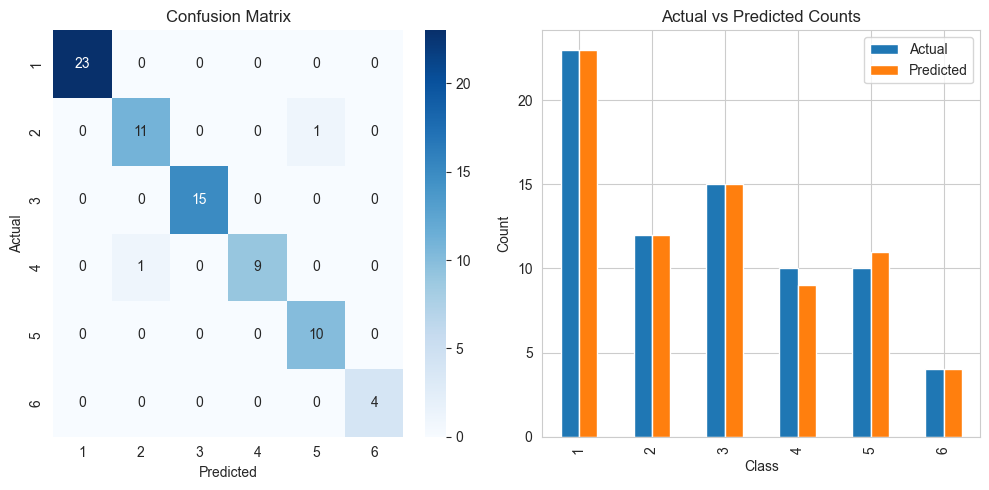

In [17]:
conf_mat = confusion_matrix(y_test, y_pred_test)

# Biểu đồ
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 2, 2)
actual_count = pd.Series(y_test).value_counts().sort_index()
predicted_count = pd.Series(y_pred_test).value_counts().sort_index()
all_counts = pd.concat([actual_count, predicted_count], axis=1, keys=['Actual', 'Predicted']).fillna(0)
all_counts.plot(kind='bar', ax=plt.gca())
plt.title('Actual vs Predicted Counts')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [18]:
# Mã hóa y dưới dạng vector 6 chiều
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Chuyển vị về đúng kích thước
X_train_T, X_test_T = X_train_scaled.T, X_test_scaled.T
y_train_T, y_test_T = y_train_encoded.T, y_test_encoded.T

In [19]:
best_W, best_b, losses, accuracies, best_accuracy = softmax_regression_nn_adam(X_train_T, y_train_T, epochs=1000, lr=0.0001)

# Kết quả độ chính xác cao nhất đạt được
print(f"Best accuracy: {best_accuracy}")

Epoch 0, Loss: 5.687120700245915, Accuracy: 0.1643835616438356
Epoch 100, Loss: 5.496907934337412, Accuracy: 0.8595890410958904
Epoch 200, Loss: 5.324182296853325, Accuracy: 0.9315068493150684
Epoch 300, Loss: 5.169462322494504, Accuracy: 0.9383561643835616
Epoch 400, Loss: 5.032857096272451, Accuracy: 0.9383561643835616
Epoch 500, Loss: 4.914044071838368, Accuracy: 0.9417808219178082
Epoch 600, Loss: 4.812300155106669, Accuracy: 0.9486301369863014
Epoch 700, Loss: 4.726581892351098, Accuracy: 0.9452054794520548
Epoch 800, Loss: 4.655633362692311, Accuracy: 0.9452054794520548
Epoch 900, Loss: 4.598097052658721, Accuracy: 0.9417808219178082
Best accuracy: 0.9486301369863014
